In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("iv_health.csv")
df.head()

,medexpense,healthinsu,age,female,blackhisp,income,illnesses,ssiratio,lowincome,firmsize,...,poverty,midincome,msa,priolist,black,logmedexpense,age2,logincome,vgh,fph
0,595,1,74,1,0,94.54589,0,0.149876,0,0.0,...,0,0,0,1,0,6.388561,5476,4.549085,1,0
1,1783,1,73,0,0,35.79638,3,0.395856,0,0.1,...,0,0,0,1,0,7.486053,5329,3.577847,1,0
2,176,0,80,1,0,9.60000,1,1.000000,0,0.0,...,1,0,1,1,0,5.170484,6400,2.261763,0,0
3,2437,1,70,0,0,38.71477,5,0.206640,0,0.0,...,0,0,1,1,0,7.798523,4900,3.656221,1,0
4,330,0,91,0,0,8.72500,3,0.537192,0,0.0,...,0,1,1,1,0,5.799093,8281,2.166193,1,0


Here we want to study factors influencing medical expenes given the endogenous regressor of both having health insurance and exogenous regressor of illness,age and income.Instruments are ss income ratio and firm multiple location. 

Dependent variable = medical expenses

Endogenous regressor = Health Insurance

Exogenous regressor = illness,age and income 

Instrument = ss income ratio , firm multiple locations 

In [4]:
df.shape

(10089, 29)

In [5]:
df.nunique()

medexpense       3386
healthinsu          2
age                27
female              2
blackhisp           2
income           6914
illnesses          10
ssiratio         6229
lowincome           2
firmsize           40
firmlocation        2
educyr             18
private             2
hisp                2
marry               2
vegood              2
good                2
fair                2
poor                2
poverty             2
midincome           2
msa                 2
priolist            2
black               2
logmedexpense    3386
age2               27
logincome        6913
vgh                 2
fph                 2
dtype: int64

In [6]:
df.isna().sum()

medexpense       0
healthinsu       0
age              0
female           0
blackhisp        0
income           0
illnesses        0
ssiratio         0
lowincome        0
firmsize         0
firmlocation     0
educyr           0
private          0
hisp             0
marry            0
vegood           0
good             0
fair             0
poor             0
poverty          0
midincome        0
msa              0
priolist         0
black            0
logmedexpense    0
age2             0
logincome        0
vgh              0
fph              0
dtype: int64

In [7]:
## Exploration of the data 

In [8]:
df.describe()

,medexpense,healthinsu,age,female,blackhisp,income,illnesses,ssiratio,lowincome,firmsize,...,poverty,midincome,msa,priolist,black,logmedexpense,age2,logincome,vgh,fph
count,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,...,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.000000,10089.00000,10089.000000
mean,1287.563386,0.382198,75.051740,0.577064,0.163544,22.122228,1.860938,0.536544,0.187432,0.140529,...,0.163346,0.322133,0.732382,0.866885,0.097036,6.481361,5677.409753,2.743275,0.59996,0.251363
std,1530.418508,0.485949,6.682109,0.494050,0.369880,21.741191,1.292858,0.367818,0.390277,2.170389,...,0.369700,0.467317,0.442739,0.339716,0.296022,1.362052,1021.706854,0.913143,0.48993,0.433818
min,1.000000,0.000000,65.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4225.000000,-6.907755,0.00000,0.000000
25%,311.000000,0.000000,70.000000,0.000000,0.000000,9.325000,1.000000,0.238095,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,5.739793,4900.000000,2.232699,0.00000,0.000000
50%,795.000000,0.000000,74.000000,1.000000,0.000000,15.536000,2.000000,0.504521,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,6.678342,5476.000000,2.743160,1.00000,0.000000
75%,1685.000000,1.000000,80.000000,1.000000,0.000000,27.524000,3.000000,0.909091,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,7.429521,6400.000000,3.315058,1.00000,1.000000
max,26375.000000,1.000000,91.000000,1.000000,1.000000,312.460000,9.000000,9.250620,1.000000,50.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,10.180170,8281.000000,5.744476,1.00000,1.000000


<AxesSubplot:>

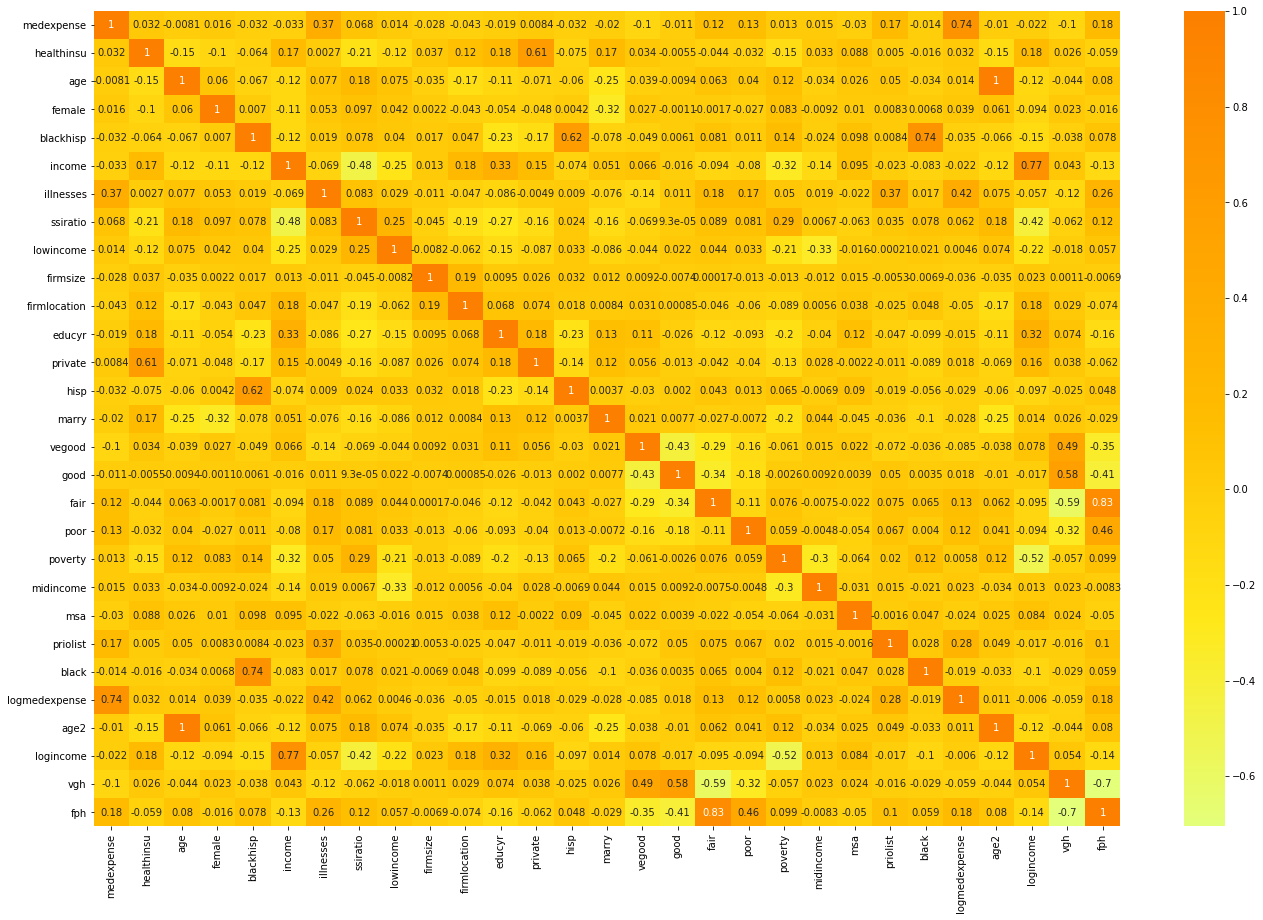

In [9]:
correlation = df.corr()
plt.figure(figsize=(23,15))
sns.heatmap(correlation, cmap = 'Wistia', annot= True)

In [10]:
## sns.pairplot(df)

In [11]:
df.columns

Index(['medexpense', 'healthinsu', 'age', 'female', 'blackhisp', 'income',
       'illnesses', 'ssiratio', 'lowincome', 'firmsize', 'firmlocation',
       'educyr', 'private', 'hisp', 'marry', 'vegood', 'good', 'fair', 'poor',
       'poverty', 'midincome', 'msa', 'priolist', 'black', 'logmedexpense',
       'age2', 'logincome', 'vgh', 'fph'],
      dtype='object')

In [12]:
import statsmodels.api as sm

<AxesSubplot:xlabel='logmedexpense', ylabel='Density'>

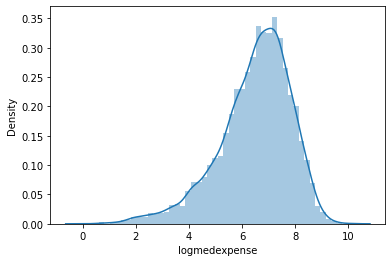

In [13]:
sns.distplot(df['logmedexpense'])

In [26]:
## enodgenous variable = healthinsu
## exogenous variable = illness, age , logincome
## instrument1 = ssiratio
## alternative instruments = illnessess,firmlocation

In [30]:
## Fittting the simple OLS regression model on the data

In [42]:
import statsmodels.api as sm
model = sm.OLS.from_formula("logmedexpense~healthinsu+age+logincome+illnesses",data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          logmedexpense   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     534.4
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        10:06:55   Log-Likelihood:                -16463.
No. Observations:               10089   AIC:                         3.294e+04
Df Residuals:                   10084   BIC:                         3.297e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7801      0.151     38.307      0.000       5.484       6.076
healthinsu     0.0750      0.026      2.882      0.004       0.024       0.126
age           -0.0026      0.002     -1.381      0.167      -0.006       0.001
logincome      0.0172      0.014      1.250      0.211      -0.010       0.044
illnesses      0.4407      0.010     46.035      0.000       0.422       0.459
==============================================================================
Omnibus:                     1081.556   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1641.180
Skew:                          -0.797   Prob(JB):                         0.00
Kurtosis:                       4.168   Cond. No.                         925.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this regression output healthinsu seems to be positively correlated with medical expenses that is having health insurance appears to have inflated the medical expenses. 

Person having medical insurance will incurr an expenditure which is 7.5% from those who doesnt have the medical insurance.

So the estimated parameter could be biased due to reverse causality. Hence we will be using instrumental variable to get around it.

Text(0.5, 1.0, 'Actual Vs Predicted values')

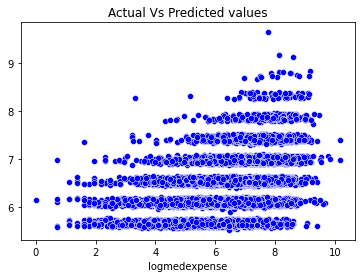

In [52]:
sns.scatterplot(df["logmedexpense"],result.fittedvalues,color='b')
plt.title("Actual Vs Predicted values")

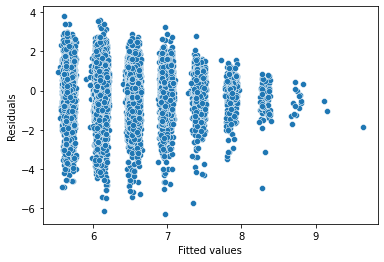

In [53]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

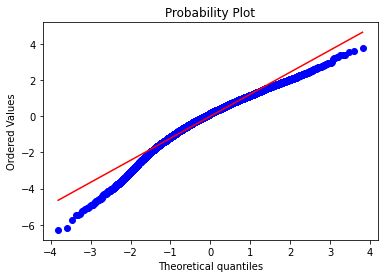

In [54]:
import scipy.stats as stats
stats.probplot(result.resid, dist="norm", plot=plt)
plt.show()

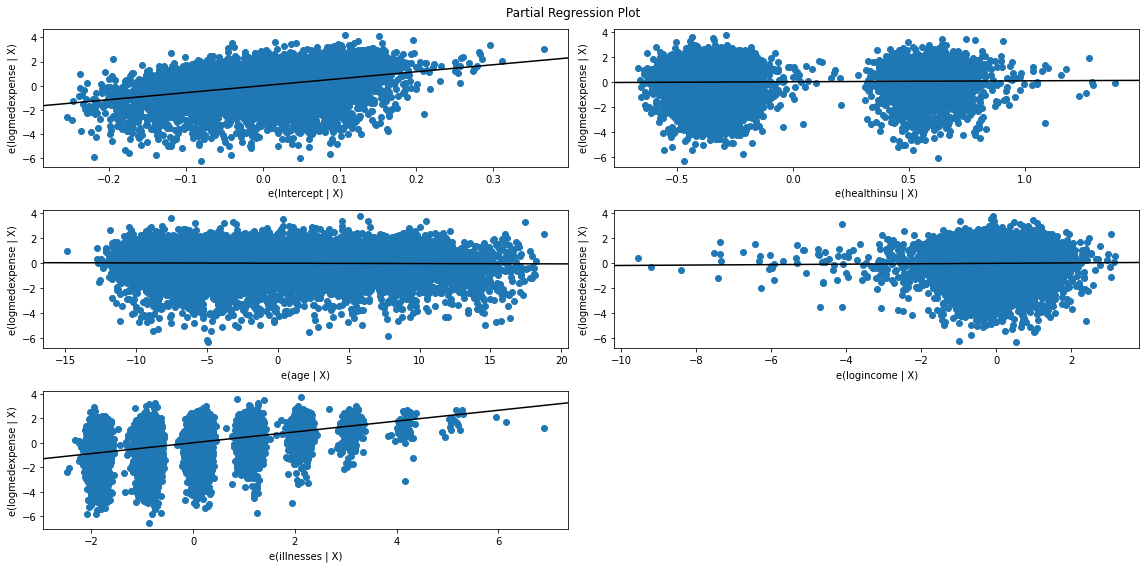

In [74]:
plt.rc("figure", figsize=(16, 8))
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad=1.0)

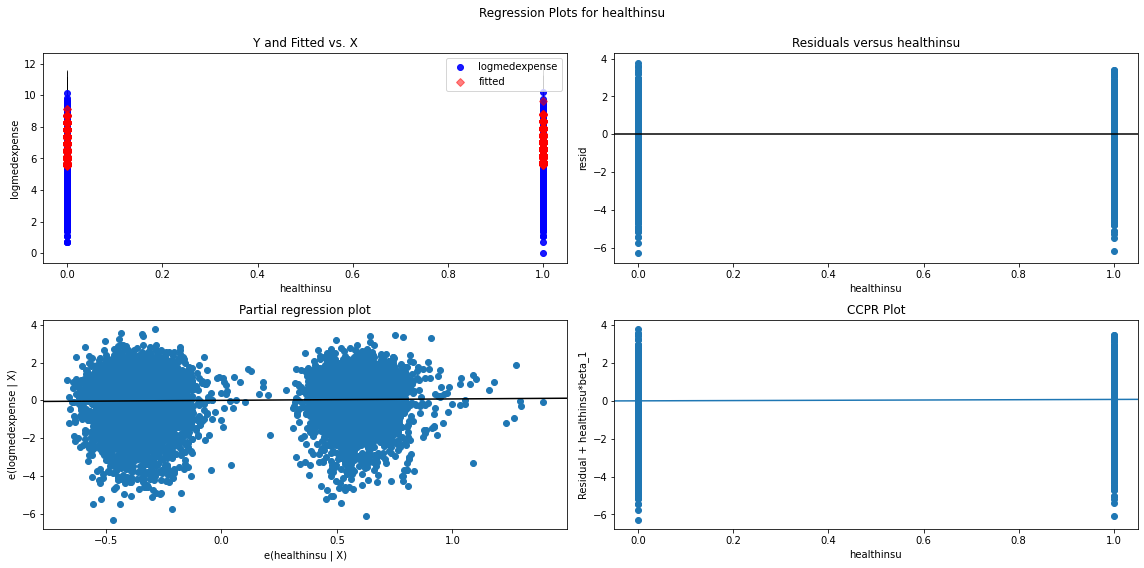

In [79]:
## Single variable regression diagnostic plot 
plt.rc("figure", figsize=(16, 8))
fig = sm.graphics.plot_regress_exog(result, "healthinsu")

In [41]:
## Installing linearmodels in python 

In [39]:
!pip install linearmodels

In [ ]:
## Use the formula to specify the model 
## for the details of formula look at the documentation. The link of documentation shared below 
## https://bashtage.github.io/linearmodels/iv/examples/using-formulas.html

In [45]:
from linearmodels.iv import IV2SLS
formula = 'logmedexpense~1+illnesses+age+logincome+[healthinsu~ssiratio]'
mod = IV2SLS.from_formula(formula,df).fit(cov_type='unadjusted')
print(mod.summary)


                          IV-2SLS Estimation Summary                          
Dep. Variable:          logmedexpense   R-squared:                      0.0709
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0706
No. Observations:               10089   F-statistic:                    1910.3
Date:                Sat, Dec 18 2021   P-value (F-stat)                0.0000
Time:                        10:15:28   Distribution:                  chi2(4)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      6.5898     0.2346     28.088     0.0000      6.1300      7.0497
age           -0.0118     0.0028    -4.2312     0.00

In [49]:
## The above regression output indicates that person having healthinsu incurred cost which was 85.22 percent less than from those who didnt have healthinsu

In [48]:
## the number of variables used in 2SLS model can also ben changed . The endogenous variable can also be estimated by using two or more Instrumental variables
from linearmodels.iv import IV2SLS
formula = 'logmedexpense~1+illnesses+age+logincome+[healthinsu~ssiratio+firmlocation]'
mod = IV2SLS.from_formula(formula,df).fit(cov_type='unadjusted')
print(mod.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:          logmedexpense   R-squared:                      0.0429
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0426
No. Observations:               10089   F-statistic:                    1863.6
Date:                Sat, Dec 18 2021   P-value (F-stat)                0.0000
Time:                        10:37:17   Distribution:                  chi2(4)
Cov. Estimator:            unadjusted                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      6.6924     0.2286     29.269     0.0000      6.2442      7.1405
age           -0.0130     0.0027    -4.7535     0.00

In [50]:
## When we use two instrumental variables then coefficient of healthinsu changes to -0.9696 from -0.8522

In [51]:
## Hausman test to check for endogeneity of regressor 
